In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
qr=QuantumRegister(2,name='qr')
anci=QuantumRegister(3,name='anci')
cr=ClassicalRegister(2,name='cr')


In [3]:
def circuit(a,qc):
    qc.cx(qr[0],anci[0])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[0])
    qc.x(anci[0])
    qc.cx(anci[0],qr[0])
    qc.cx(qr[0],anci[2])
    qc.x(anci[2])
    qc.h(anci[2])
    qc.h(qr[1])
    qc.cx(qr[1],anci[2])
    qc.h(qr[1])
    qc.h(anci[2])
    qc.x(anci[2])
    qc.x(anci[0])
    qc.cu(a,-pi/2,pi/2,0,anci[0],qr[1])
    qc.x(anci[0])
    qc.cx(qr[0],qr[1])
    qc.h(anci[2])
    qc.cx(anci[2],qr[1])
    qc.cx(anci[2],qr[0])
    qc.h(anci[2])
    qc.ch(anci[2],qr[0])
    qc.barrier()
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])

In [4]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
backend=provider.get_backend('ibmq_quito')


/home/nav/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [5]:
t=arange(0,0.005,0.00025)
w=5
phi=0
m=1
def f(t):
    A=1
    return((A*cos(w*t + phi))/sqrt(2*m)) 

p=[]
q=[]
r=[]
s=[]
theta=[b*f(b) for b in t]
qc=QuantumCircuit(qr,anci,cr)

In [6]:
for a in theta:
    circuit(a,qc)
    job=execute(qc,backend,shots=100)
    results=job.result()
    counts=results.get_counts()
    p.append(counts['00']/100)
    q.append(counts['01']/100)
    s.append(counts['10']/100)
    r.append(counts['11']/100)
    qc.reset(qr)
    qc.reset(anci)

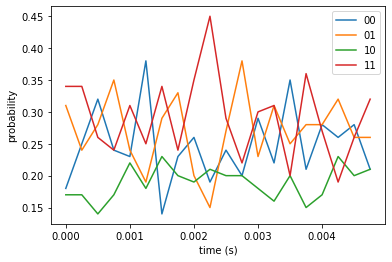

In [7]:
plot(t,p,label='00')
plot(t,q,label='01')
plot(t,r,label='10')
plot(t,s,label='11')
xlabel('time (s)')
ylabel('probability')
legend()